Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100, 100, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 100, 100, 100)     2800      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 50, 100)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 50, 50, 100)       90100     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 100)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 25, 25, 100)       90100     
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 50, 50, 100)       0     

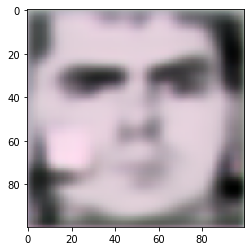

In [33]:
from azureml.core import Workspace, Run, Experiment, Model
import tensorflow
from tensorflow import keras
import numpy as np
import os
from PIL import Image   
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage import data, color, io, filters, morphology,transform, exposure, feature, util
from skimage.io import imread, imshow
import imageio
import matplotlib





image_size = 100


image = 'testfaces/test.png'
nr_faces = 8
X_met_vierkant = []


# read train_images + vierkantje op afbeelding plaatsen 
path = 'Ongeziene_Faces/'
valid_images = [".jpg",".gif",".png"]

for f in os.listdir(path)[:nr_faces]:
    ext = os.path.splitext(f)[1]
    if ext.lower() not in valid_images:
        continue
    im = imread(os.path.join(path,f))
    #im = cv2.imread(os.path.join(path,f),0) # convert to gray 
    im = transform.resize(im,(image_size,image_size),mode='constant',anti_aliasing=True)

    #Generate random coordinates
    x, y = np.random.randint(0,image_size-25, size=2)

    #vierkantje toevoegen op afbeelding
    data = np.array(im)
    data[x:x+15,y:y+15]=255
    
    #data = (data * 255).astype(np.uint8)#fixt de error van imshow
    X_met_vierkant.append(data)

#voorbeeld tonen
img =  X_met_vierkant[2]

plt.imshow(img)




X_train_noise = np.asarray(X_met_vierkant) # -> vstack -> values

X_train_noise = np.clip(X_train_noise, 0., 1.) #fix noise error van imshow 255

#matplotlib.pyplot.imsave("images_square/image9.jpg",X_train_noise[8])



X_train_noise = np.reshape(X_train_noise, (len(X_train_noise), image_size, image_size, 3)) 


image1 = X_train_noise[1]
image1 = np.reshape(image1, (1, image_size, image_size, 3)) 

model = keras.models.load_model('api/app/download/model.h5')

model.summary()


print(image1.shape)

result = model.predict(image1)
print(result)

from tensorflow.keras.preprocessing.image import array_to_img

result = np.reshape(result, (100, 100, 3))  
PIL_image = array_to_img(result)

plt.imshow(PIL_image)

